# Predictive Modeling of Agricultural Crop Yield

##### 1.Agricultural yield primarily depends on weather conditions (rainfall, temperature, etc.)
##### 2.the pesticides used, the type of soil, and accurate information on the historical yield of crops, which is important for 3.making decisions related to agricultural risk management and future forecasts.

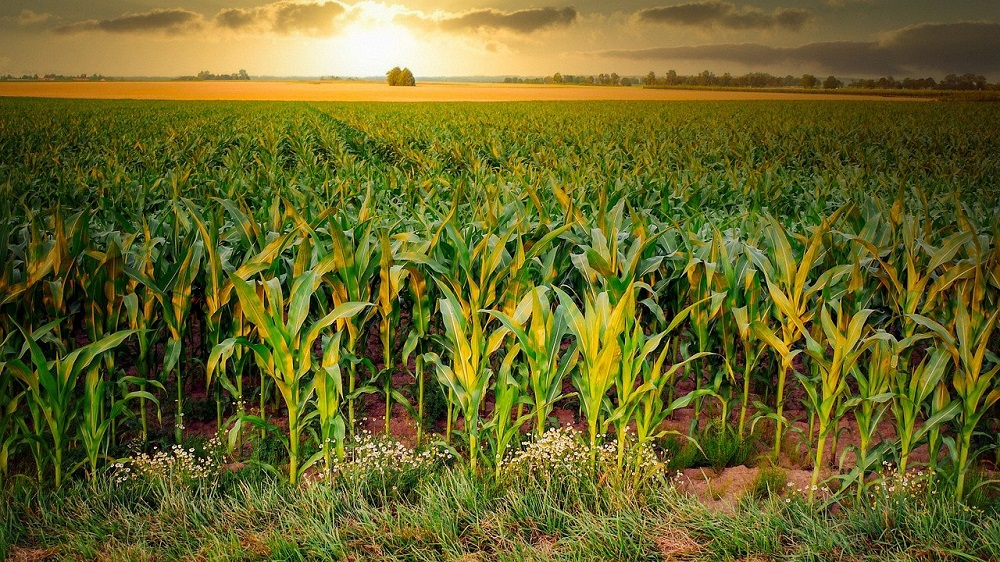

# 1. Load Python Modules

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tabulate import tabulate

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

# 2. Read the Dataset from CSV file - Using Pandas -->

In [3]:
data=pd.read_csv("yield_df.csv")
data.head()

Unnamed: 0     Area         Item  Year  hg/ha_yield  \
0           0  Albania        Maize  1990        36613   
1           1  Albania     Potatoes  1990        66667   
2           2  Albania  Rice, paddy  1990        23333   
3           3  Albania      Sorghum  1990        12500   
4           4  Albania     Soybeans  1990         7000   

   average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
0                         1485.0              121.0     16.37  
1                         1485.0              121.0     16.37  
2                         1485.0              121.0     16.37  
3                         1485.0              121.0     16.37  
4                         1485.0              121.0     16.37

In [4]:
data.drop(columns=["Unnamed: 0"],inplace=True)
data.head()

Area         Item  Year  hg/ha_yield  average_rain_fall_mm_per_year  \
0  Albania        Maize  1990        36613                         1485.0   
1  Albania     Potatoes  1990        66667                         1485.0   
2  Albania  Rice, paddy  1990        23333                         1485.0   
3  Albania      Sorghum  1990        12500                         1485.0   
4  Albania     Soybeans  1990         7000                         1485.0   

   pesticides_tonnes  avg_temp  
0              121.0     16.37  
1              121.0     16.37  
2              121.0     16.37  
3              121.0     16.37  
4              121.0     16.37

# 3. Basic Inspection on given dataset

In [5]:
def basic_inspection_dataset(table):
    """Generates a basic inspection dataset from the given table."""
    
    print("top 5 rows - using head")
    print(table.head())
    print()
        
    print("bottom 5 rows using tail")
    print(table.tail())
    print()
        
    print("numbers of samples and columns")
    print(table.shape)
    print()
    
    print("numbers of samples ")
    print(len(table))
    print()
    
    print("numbers of entries in the data frame")
    print(table.size)
    print()
    
    print("Columns Names")
    print(table.columns)
    print()

    print("Columns dtypes")
    print(table.dtypes)
    print()
    
    print("Dataframe info")
    print(table.info())
    print()
    
    print()
    print("check the missing value in each column")
    print(table.isnull().sum())
          
    print()
    print("check the missing value in each column")
    print(table.isna().sum())
    
    print(table.describe())

basic_inspection_dataset(data)

top 5 rows - using head
      Area         Item  Year  hg/ha_yield  average_rain_fall_mm_per_year  \
0  Albania        Maize  1990        36613                         1485.0   
1  Albania     Potatoes  1990        66667                         1485.0   
2  Albania  Rice, paddy  1990        23333                         1485.0   
3  Albania      Sorghum  1990        12500                         1485.0   
4  Albania     Soybeans  1990         7000                         1485.0   

   pesticides_tonnes  avg_temp  
0              121.0     16.37  
1              121.0     16.37  
2              121.0     16.37  
3              121.0     16.37  
4              121.0     16.37  

bottom 5 rows using tail
           Area            Item  Year  hg/ha_yield  \
28237  Zimbabwe     Rice, paddy  2013        22581   
28238  Zimbabwe         Sorghum  2013         3066   
28239  Zimbabwe        Soybeans  2013        13142   
28240  Zimbabwe  Sweet potatoes  2013        22222   
28241  Zimbabwe    

# 4. Categorical- Variable - Analysis -Using Pipeline

Area frequency table
+-----+--------------------------+-----------+
|     |          Class           | Frequency |
+-----+--------------------------+-----------+
|  0  |          India           |   4048    |
|  1  |          Brazil          |   2277    |
|  2  |          Mexico          |   1472    |
|  3  |         Pakistan         |   1449    |
|  4  |          Japan           |    966    |
|  5  |        Australia         |    966    |
|  6  |        Indonesia         |    828    |
|  7  |       South Africa       |    644    |
|  8  |          Turkey          |    625    |
|  9  |         Ecuador          |    621    |
| 10  |          Canada          |    552    |
| 11  |          Spain           |    483    |
| 12  |         Colombia         |    414    |
| 13  |        Argentina         |    368    |
| 14  |    Dominican Republic    |    368    |
| 15  |          Italy           |    322    |
| 16  |          Egypt           |    322    |
| 17  |         Morocco          |    3

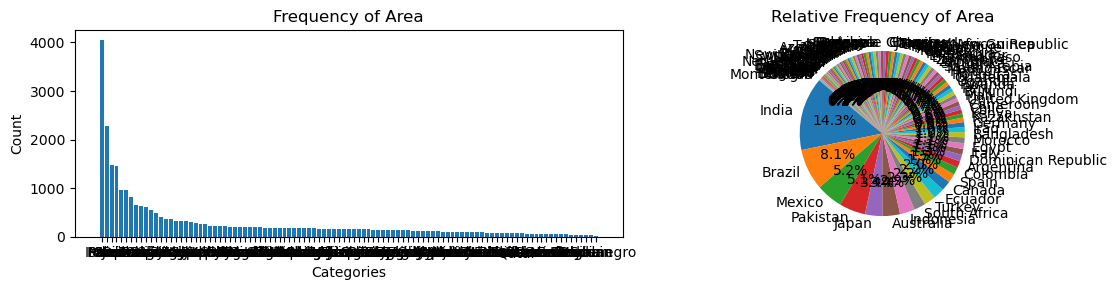

Item frequency table
+---+----------------------+-----------+
|   |        Class         | Frequency |
+---+----------------------+-----------+
| 0 |       Potatoes       |   4276    |
| 1 |        Maize         |   4121    |
| 2 |        Wheat         |   3857    |
| 3 |     Rice, paddy      |   3388    |
| 4 |       Soybeans       |   3223    |
| 5 |       Sorghum        |   3039    |
| 6 |    Sweet potatoes    |   2890    |
| 7 |       Cassava        |   2045    |
| 8 |         Yams         |    847    |
| 9 | Plantains and others |    556    |
+---+----------------------+-----------+
Item Relative frequency table
+---+----------------------+-----------+----------------------+
|   |        Class         | Frequency | Relative Frequency % |
+---+----------------------+-----------+----------------------+
| 0 |       Potatoes       |   4276    |        15.14         |
| 1 |        Maize         |   4121    |        14.59         |
| 2 |        Wheat         |   3857    |        13.66  

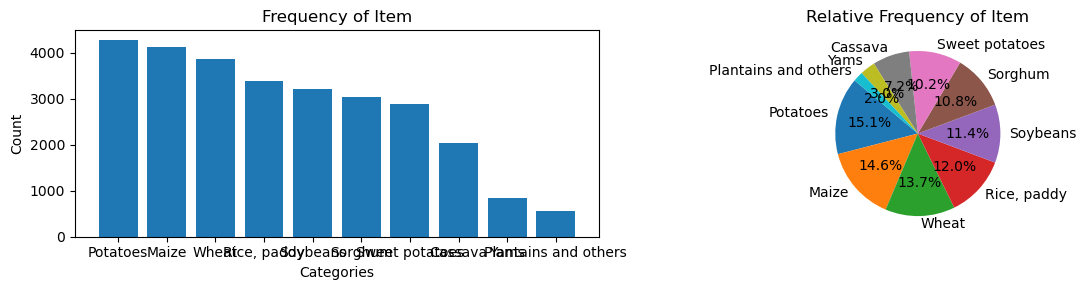

In [8]:
class BarPieChartTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df=X.copy()
        # get cat columns 
        cat_cols = df.select_dtypes(include='object').columns
        for cat_name in cat_cols:
            value_counts = df[cat_name].value_counts().reset_index()
            # Rename the columns
            value_counts.columns = ['Class', 'Frequency']

            # Print the result as a table
            print(f"{cat_name} frequency table")
            print(tabulate(value_counts, headers='keys', tablefmt='pretty'))

            # Calculate relative frequency
            total_count = value_counts['Frequency'].sum()
            value_counts['Relative Frequency %'] = round((value_counts['Frequency'] / total_count)*100,2)

            # Print the result as a table
            print(f"{cat_name} Relative frequency table")
            print(tabulate(value_counts, headers='keys', tablefmt='pretty'))

            # Extract the values and index from value counts
            value_counts = df[cat_name].value_counts()
            values = value_counts.values
            labels = value_counts.index

            fig, axs = plt.subplots(1, 2, figsize=(12,3))  # 1 row, 2 columns
            # Create a bar graph
            axs[0].bar(labels, values)
            axs[0].set_title(f'Frequency of {cat_name}')
            axs[0].set_xlabel('Categories')  # Set x-label
            axs[0].set_ylabel('Count')       # Set y-label

            axs[1].pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
            axs[1].set_title(f'Relative Frequency of {cat_name}')
            plt.tight_layout()
            # Show the plot
            plt.show()  
        
pipeline_cat_var = Pipeline([
    ('cat_univaraite_analysis', BarPieChartTransformer())
])

# Fit and transform your data using the pipeline
processed_data = pipeline_cat_var.fit_transform(data)  

# 5. Numerical - UniVariate - Analysis - Using -Pipeline

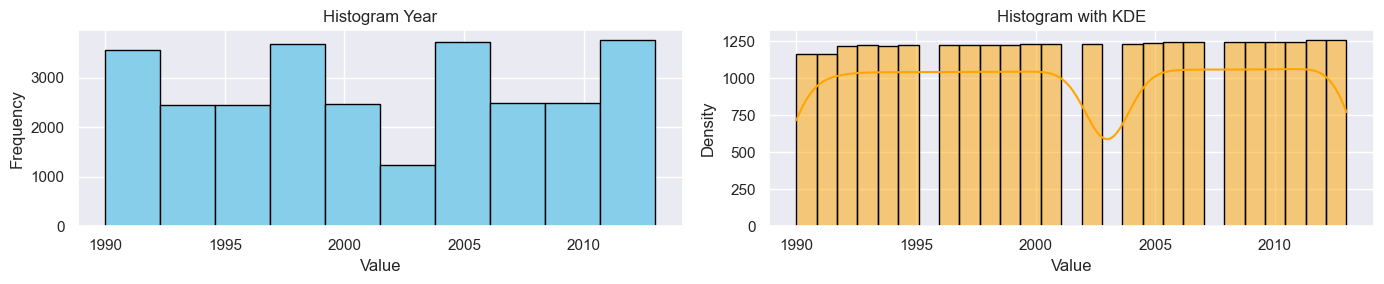

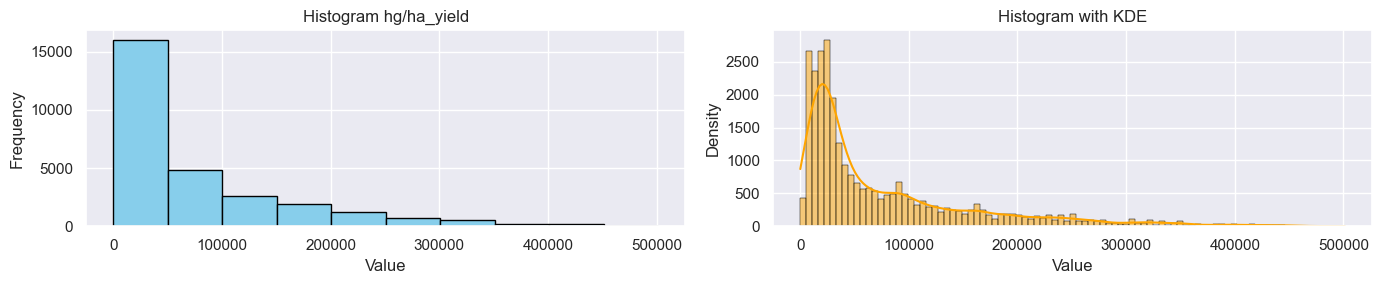

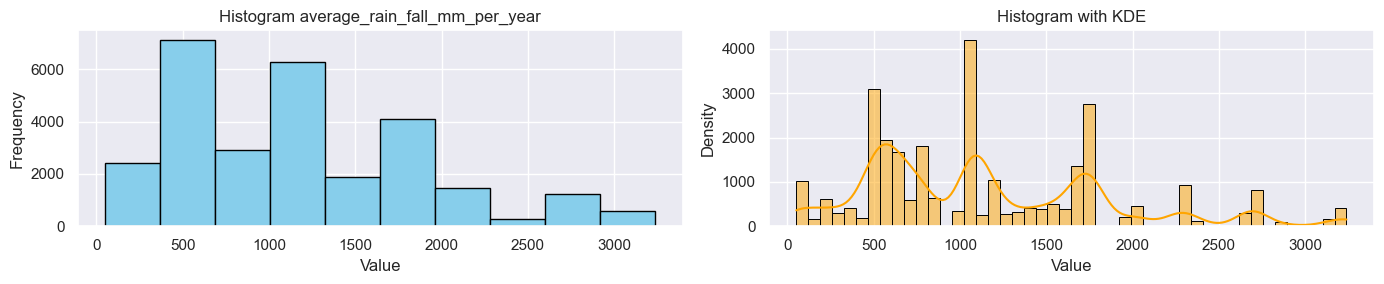

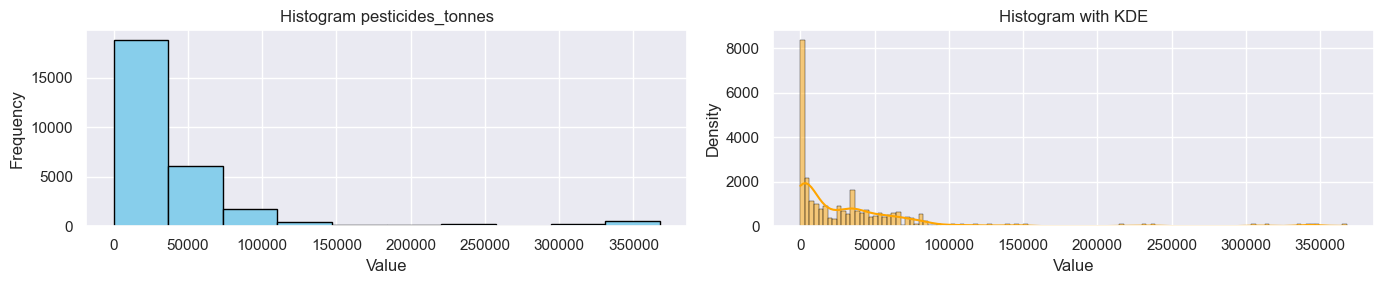

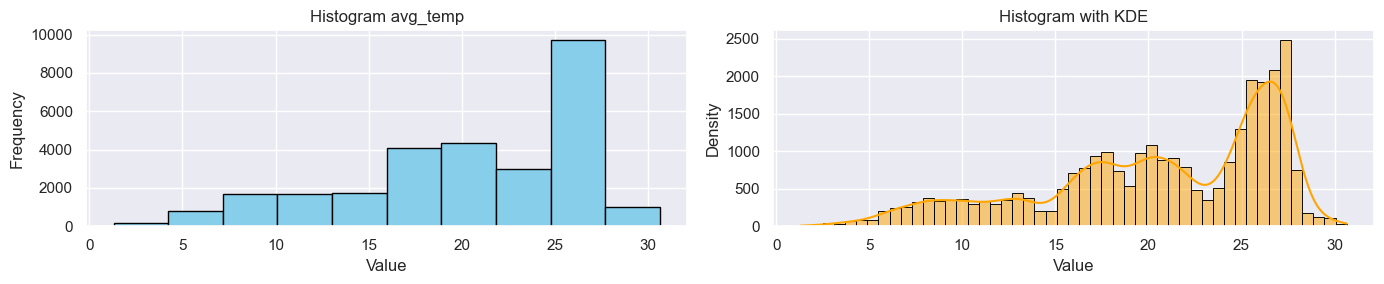

In [85]:
class HistBoxChartTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df=X.copy()
        # getting num cols
        num_cols = df.select_dtypes(exclude='object').columns
        for con_var in num_cols:
                
            # Create a figure and axes object
            fig, axes = plt.subplots(1, 2, figsize=(14,3))

            # Plot histogram without KDE on the left
            axes[0].hist(df[con_var], color='skyblue', edgecolor='black')
            axes[0].set_xlabel('Value')
            axes[0].set_ylabel('Frequency')
            axes[0].set_title(f'Histogram {con_var}')

            # Plot histogram with KDE on the right
            sns.histplot(data=df, x=con_var, kde=True, color='orange', edgecolor='black', ax=axes[1])
            axes[1].set_xlabel('Value')
            axes[1].set_ylabel('Density')
            axes[1].set_title('Histogram with KDE')

            # Adjust layout
            plt.tight_layout()

            # Show the combined plot
            plt.show()
pipeline_num_var = Pipeline([
    ('num_uni_variate_analysis', HistBoxChartTransformer())
])

# Fit and transform your data using the pipeline
processed_data = pipeline_num_var.fit_transform(data)  

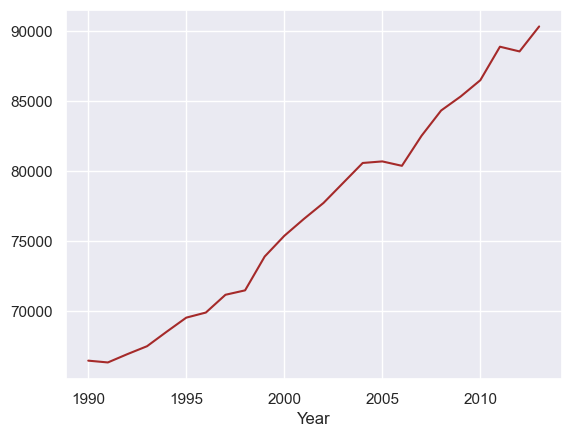

In [86]:
data2 = data[data['Item']=='Yams']
data.groupby('Year')['hg/ha_yield'].mean().plot(color='brown')
plt.show()

# 6.correlation

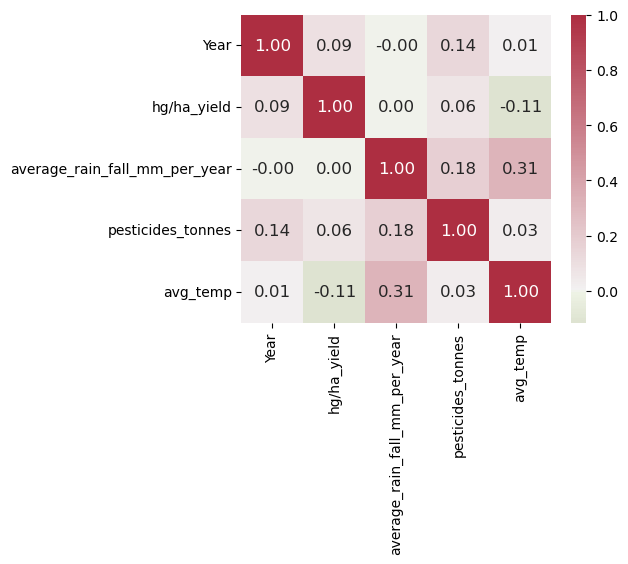

In [11]:
matrice_corr = data.drop(['Area', 'Item'], axis=1).corr()
cmap = sns.diverging_palette(100, 7, s = 75, l = 40, n = 20, center = 'light', as_cmap = True)

plt.figure(figsize=(5, 4))
sns.heatmap(matrice_corr, annot = True, cmap = cmap, fmt = '.2f', center = 0,
            annot_kws = {'size': 12});

# 7. Outliers Anaylsis 

In [88]:
df_num_features=data.select_dtypes(include=np.number)

In [89]:
Q1 = df_num_features.quantile(0.25)
Q3 = df_num_features.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year                                13.0000
hg/ha_yield                      84757.5000
average_rain_fall_mm_per_year     1075.0000
pesticides_tonnes                46985.8800
avg_temp                             9.2975
dtype: float64


In [90]:
outlier = pd.DataFrame((df_num_features < (Q1 - 1.5 * IQR)) | (df_num_features > (Q3 + 1.5 * IQR)))

for i in outlier.columns:
    print('Total number of Outliers in column {} are {}'.format(i, (len(outlier[outlier[i] == True][i]))))

Total number of Outliers in column Year are 0
Total number of Outliers in column hg/ha_yield are 2059
Total number of Outliers in column average_rain_fall_mm_per_year are 0
Total number of Outliers in column pesticides_tonnes are 1418
Total number of Outliers in column avg_temp are 34


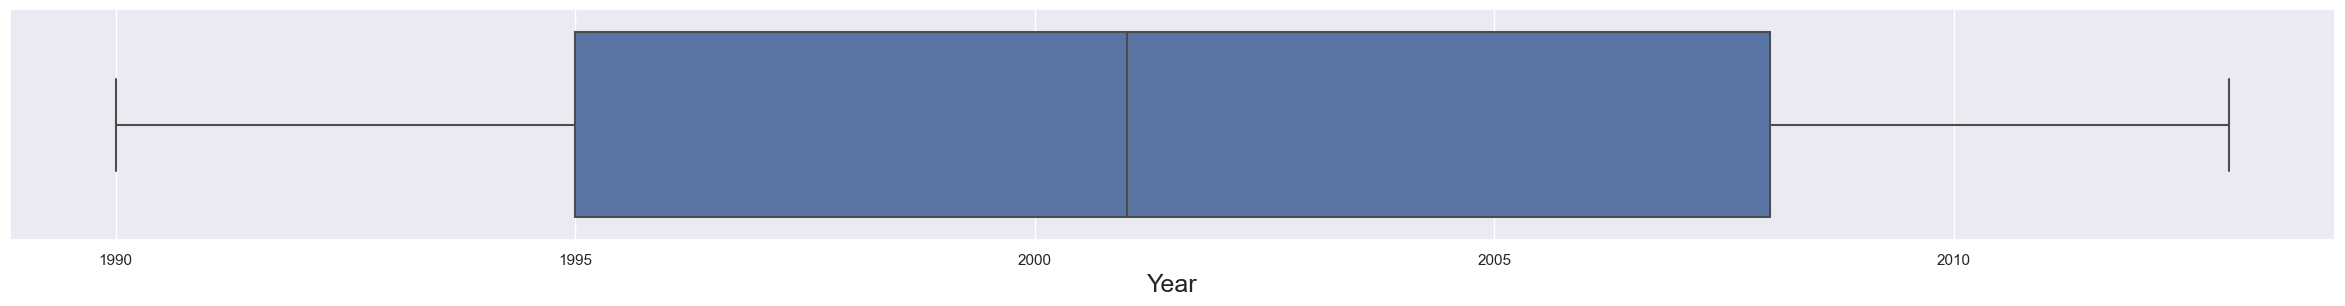

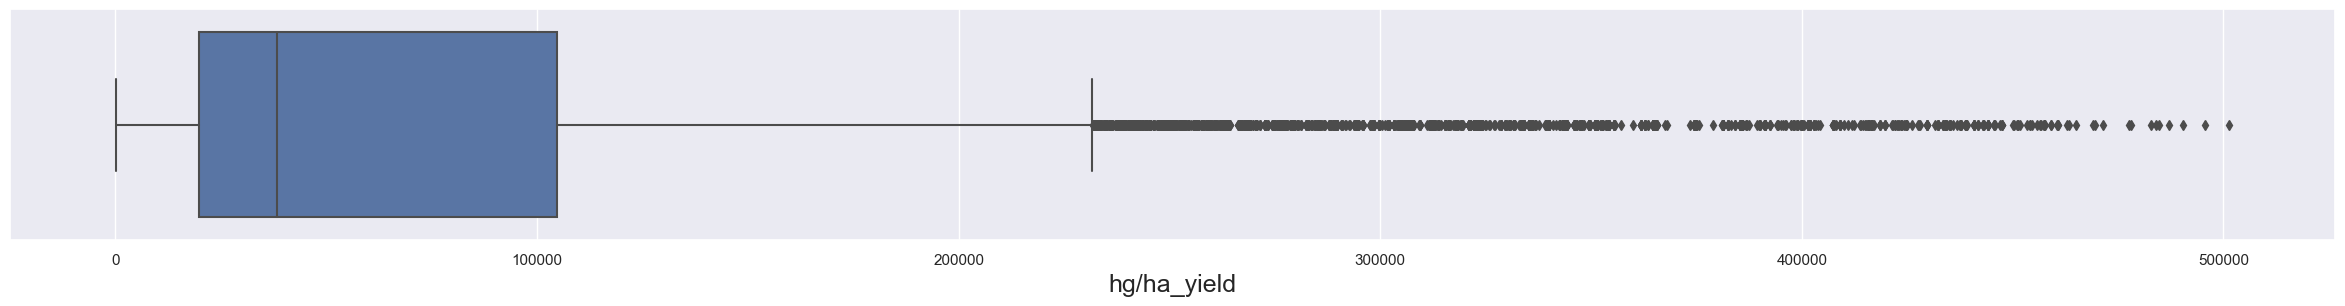

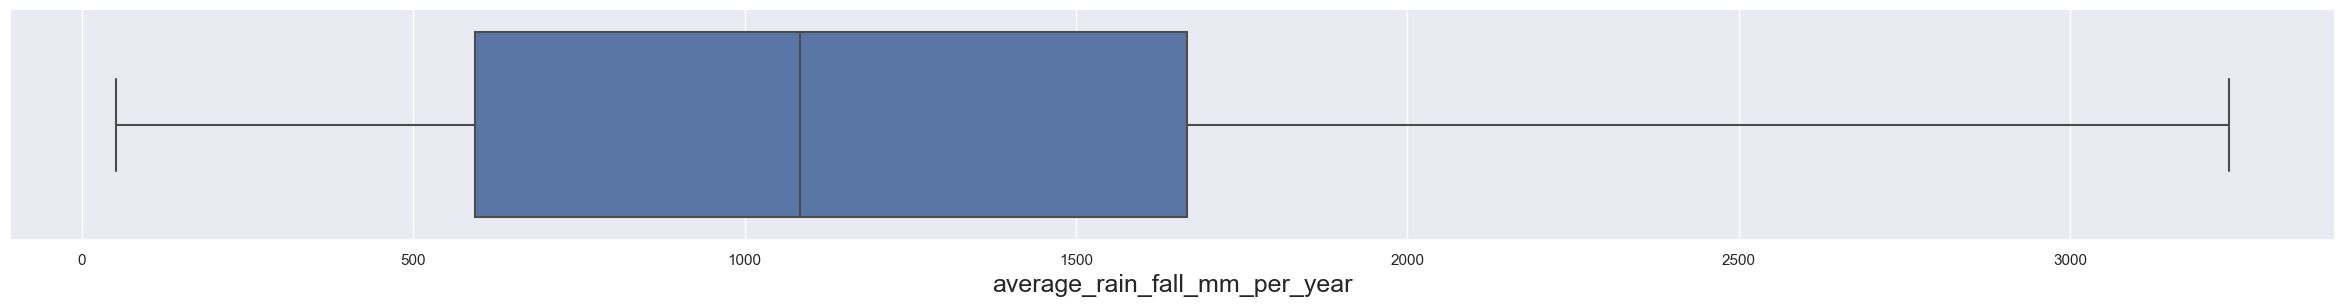

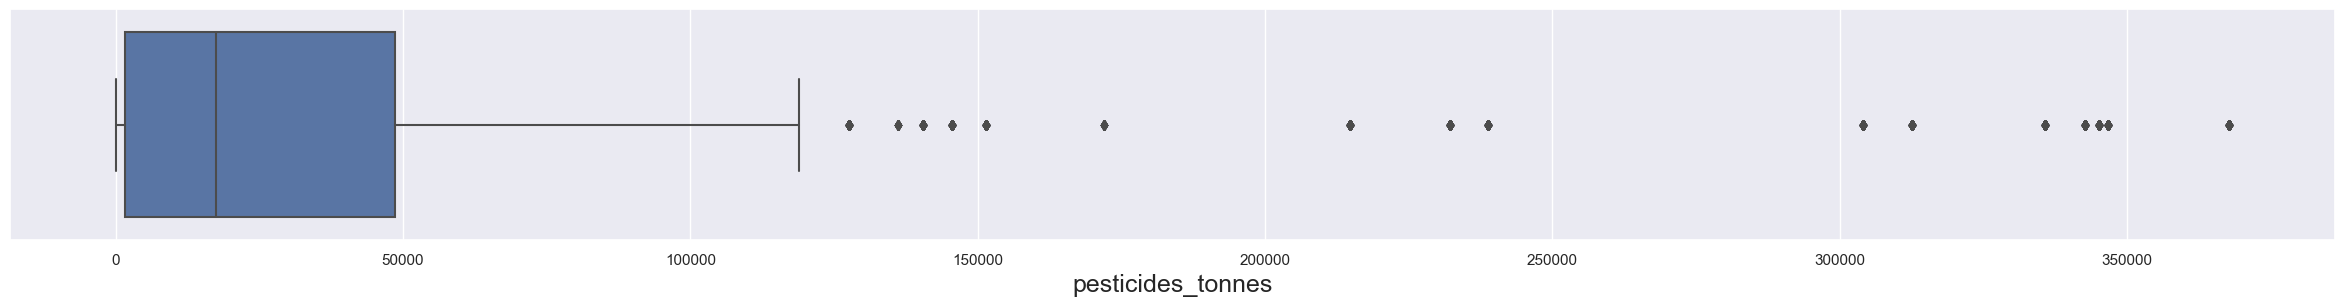

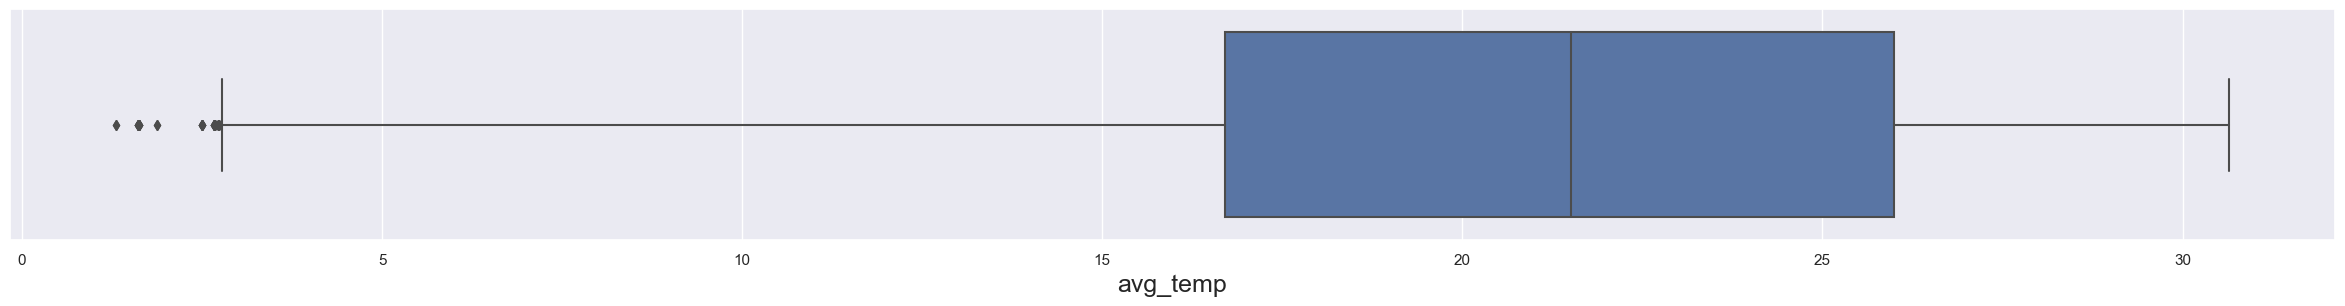

In [91]:
for column in enumerate(df_num_features):
    plt.figure(figsize=(30,3))
    sns.set_theme(style="darkgrid")
    sns.boxplot(x=column[1], data=  df_num_features)
    plt.xlabel(column[1],fontsize=18)
    plt.show()

In [92]:
data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data.head()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13088\981407220.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]


Area         Item  Year  hg/ha_yield  average_rain_fall_mm_per_year  \
0  Albania        Maize  1990        36613                         1485.0   
1  Albania     Potatoes  1990        66667                         1485.0   
2  Albania  Rice, paddy  1990        23333                         1485.0   
3  Albania      Sorghum  1990        12500                         1485.0   
4  Albania     Soybeans  1990         7000                         1485.0   

   pesticides_tonnes  avg_temp  
0              121.0     16.37  
1              121.0     16.37  
2              121.0     16.37  
3              121.0     16.37  
4              121.0     16.37

# 8. Convert Cat - to - Numerical Columns

In [93]:
def encode_categoric_values(df, columns):
    """
    Encode categorical values in specified columns with unique numbers and return the modified DataFrame.

    Parameters:
    df (pd.DataFrame): The input DataFrame.
    columns (list): List of column names to encode.

    Returns:
    pd.DataFrame: DataFrame with encoded categorical values.
    """
    for col in columns:
        # Get unique values and create a mapping
        unique_values = df[col].unique()
        value_mapping = {value: idx for idx, value in enumerate(unique_values)}

        # Apply the mapping to the column
        df[col] = df[col].map(value_mapping)

        # Print the mapping for the current column
        print(f"Column '{col}':")
        for value, idx in value_mapping.items():
            print(f"  {value} -> {idx}")
        print("-" * 40)
    
    return df

# Example usage:
# df_encoded = encode_categoric_values(df, ['categorical_col1', 'categorical_col2'])

encoded_df = encode_categoric_values(data,cat_vars)

Column 'Area':
  Albania -> 0
  Algeria -> 1
  Angola -> 2
  Argentina -> 3
  Armenia -> 4
  Australia -> 5
  Austria -> 6
  Azerbaijan -> 7
  Bahamas -> 8
  Bahrain -> 9
  Bangladesh -> 10
  Belarus -> 11
  Belgium -> 12
  Botswana -> 13
  Brazil -> 14
  Bulgaria -> 15
  Burkina Faso -> 16
  Burundi -> 17
  Cameroon -> 18
  Canada -> 19
  Central African Republic -> 20
  Chile -> 21
  Colombia -> 22
  Croatia -> 23
  Denmark -> 24
  Dominican Republic -> 25
  Ecuador -> 26
  Egypt -> 27
  El Salvador -> 28
  Eritrea -> 29
  Estonia -> 30
  Finland -> 31
  France -> 32
  Germany -> 33
  Ghana -> 34
  Greece -> 35
  Guatemala -> 36
  Guinea -> 37
  Guyana -> 38
  Haiti -> 39
  Honduras -> 40
  Hungary -> 41
  India -> 42
  Indonesia -> 43
  Iraq -> 44
  Ireland -> 45
  Italy -> 46
  Jamaica -> 47
  Japan -> 48
  Kazakhstan -> 49
  Kenya -> 50
  Latvia -> 51
  Lebanon -> 52
  Lesotho -> 53
  Libya -> 54
  Lithuania -> 55
  Madagascar -> 56
  Malawi -> 57
  Malaysia -> 58
  Mali -> 59
  M

In [94]:
encoded_df.head()

Area  Item  Year  hg/ha_yield  average_rain_fall_mm_per_year  \
0     0     0  1990        36613                         1485.0   
1     0     1  1990        66667                         1485.0   
2     0     2  1990        23333                         1485.0   
3     0     3  1990        12500                         1485.0   
4     0     4  1990         7000                         1485.0   

   pesticides_tonnes  avg_temp  
0              121.0     16.37  
1              121.0     16.37  
2              121.0     16.37  
3              121.0     16.37  
4              121.0     16.37

#  9.Spliting the data

In [95]:
x=encoded_df.drop(columns=['hg/ha_yield',"Year"])
y=encoded_df['hg/ha_yield']

In [106]:
x.head()

Area  Item  average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp
0     0     0                         1485.0              121.0     16.37
1     0     1                         1485.0              121.0     16.37
2     0     2                         1485.0              121.0     16.37
3     0     3                         1485.0              121.0     16.37
4     0     4                         1485.0              121.0     16.37

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
x_train,x_test,y_train,y_test=train_test_split( x, y, test_size=0.33, random_state=42)

In [98]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((16626, 5), (16626,), (8189, 5), (8189,))

# 10.Model Developing 

In [99]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [100]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor()
RF.fit(x_train,y_train)

RandomForestRegressor()

In [101]:
from sklearn.ensemble import AdaBoostRegressor
AD=AdaBoostRegressor()
AD.fit(x_train,y_train)

AdaBoostRegressor()

In [102]:
RF_predict=RF.predict(x_test)
lr_predict=lr.predict(x_test)
AD_predict=AD.predict(x_test)

In [103]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [104]:
def report(y_predict):
    r2=round(r2_score(y_predict,y_test),2)
    adj_r2=round(1-(1-r2)*(len(y)-1)/(len(y)-1-(x.shape[1]-1)),2)
    MAE=mean_absolute_error(y_predict,y_test)
    RMSE=np.sqrt(mean_squared_error(y_predict,y_test))
    MSE=mean_squared_error(y_predict,y_test)
    return [r2,adj_r2, RMSE,MSE,MAE]

In [105]:
rf_report=report(RF_predict)
lr_report=report(lr_predict)
ad_report=report(AD_predict)
pd.DataFrame(zip(rf_report,lr_report,ad_report),
             columns=['RandomForestRegressor','LinearRegression','AdaBoostRegressor'],
             index=['r2','adj_r2','RMSE','MSE','MAE'])

RandomForestRegressor  LinearRegression  AdaBoostRegressor
r2               9.600000e-01     -3.625000e+01       4.300000e-01
adj_r2           9.600000e-01     -3.626000e+01       4.300000e-01
RMSE             1.120249e+04      5.408429e+04       3.163375e+04
MSE              1.254958e+08      2.925111e+09       1.000694e+09
MAE              5.001058e+03      4.299322e+04       2.421801e+04

In [107]:
import joblib
model=joblib.dump(RF,"model_rf.joblib")